# Chapter 4 - Training Models - Stansbury's Coding Examples



## Demonstration Setup

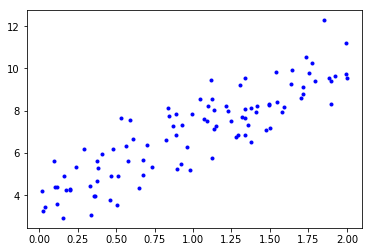

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [2]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

## Linear Regression - Closed-Form Solution

Theta (i=1): [[3.8210279 ]
 [3.15568533]]


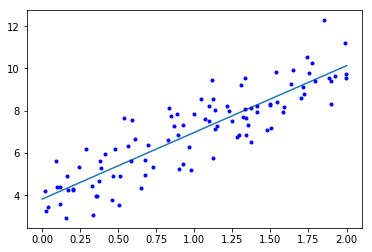

In [3]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

In [4]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print(y_predict)

[[ 3.8210279 ]
 [ 5.39887056]
 [ 6.97671323]
 [ 8.55455589]
 [10.13239855]]


In [5]:
#####################################################################
#####################################################################

## Linear Regression using Scikit-Learn

Theta (i=1): [array([3.8210279]), array([[3.15568533]])]


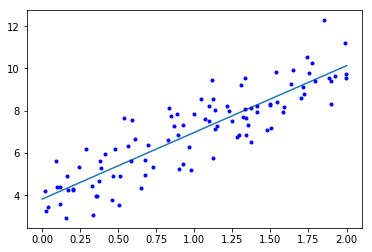

In [6]:
from sklearn.linear_model import LinearRegression
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

In [7]:
# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print(y_predict)

[[ 3.8210279 ]
 [ 5.39887056]
 [ 6.97671323]
 [ 8.55455589]
 [10.13239855]]


In [8]:
#####################################################################
#####################################################################

## Batch Linear Regression

Theta (i=1): [[-0.0580916 ]
 [-0.35171778]]
Theta (i=1): [[1.41796054]
 [1.34814765]]
Theta (i=2): [[2.25943614]
 [2.30482101]]
Theta (i=3): [[2.74162354]
 [2.84108192]]
Theta (i=4): [[3.02031276]
 [3.13958533]]
Theta (i=5): [[3.18367004]
 [3.30369042]]
Theta (i=6): [[3.28159344]
 [3.39188334]]
Theta (i=7): [[3.34232507]
 [3.43725689]]
Theta (i=8): [[3.38185186]
 [3.458534  ]]
Theta (i=9): [[3.40922547]
 [3.46630592]]
Theta (i=10): [[3.42957275]
 [3.46656227]]
Theta (i=11): [[3.4457994 ]
 [3.46268879]]
Theta (i=12): [[3.45955402]
 [3.45659779]]
Theta (i=13): [[3.47177375]
 [3.44936789]]
Theta (i=14): [[3.48299293]
 [3.44160601]]
Theta (i=15): [[3.49351788]
 [3.43365226]]
Theta (i=16): [[3.50352575]
 [3.42569588]]
Theta (i=17): [[3.51312048]
 [3.41784079]]
Theta (i=18): [[3.52236448]
 [3.41014273]]
Theta (i=19): [[3.53129654]
 [3.40263031]]
Theta (i=20): [[3.53994199]
 [3.39531681]]
Theta (i=21): [[3.54831844]
 [3.38820697]]
Theta (i=22): [[3.55643903]
 [3.38130076]]
Theta (i=23): [[3.5

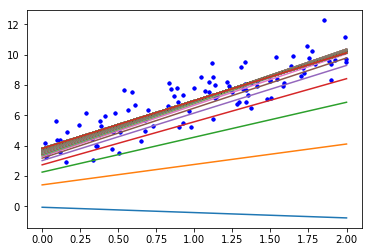

In [9]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)
    
                
    

In [10]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 3.82057559]
 [ 5.39861112]
 [ 6.97664665]
 [ 8.55468217]
 [10.1327177 ]]


In [11]:
#####################################################################
#####################################################################

## Stochastic Gradient Descent

In [12]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[-1.43112667]
 [ 0.72072449]]
Theta (i=1): [[3.649962  ]
 [3.06413201]]
Theta (i=2): [[3.65196518]
 [3.19478424]]
Theta (i=3): [[3.64915193]
 [3.12441283]]
Theta (i=4): [[3.6788586]
 [3.298223 ]]
Theta (i=5): [[3.70425801]
 [3.28400484]]
Theta (i=6): [[3.82227515]
 [3.32755354]]
Theta (i=7): [[3.76520825]
 [3.1210902 ]]
Theta (i=8): [[3.85538166]
 [3.19290799]]
Theta (i=9): [[3.86913436]
 [3.27266239]]
Theta (i=10): [[3.75121226]
 [3.12673554]]
Theta (i=11): [[3.74815641]
 [3.1003783 ]]
Theta (i=12): [[3.85725326]
 [3.23190551]]
Theta (i=13): [[3.77412158]
 [3.11677311]]
Theta (i=14): [[3.844794  ]
 [3.23016067]]
Theta (i=15): [[3.81214601]
 [3.19110233]]
Theta (i=16): [[3.77785796]
 [3.1584829 ]]
Theta (i=17): [[3.76511032]
 [3.18743179]]
Theta (i=18): [[3.77278125]
 [3.25382602]]
Theta (i=19): [[3.75130956]
 [3.21817538]]
Theta (i=20): [[3.79110572]
 [3.1513981 ]]
Theta (i=21): [[3.77834813]
 [3.13419758]]
Theta (i=22): [[3.80646391]
 [3.1376268 ]]
Theta (i=23): [[3.807

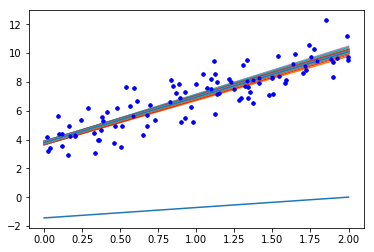

In [13]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [14]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 3.80378892]
 [ 5.37515424]
 [ 6.94651957]
 [ 8.51788489]
 [10.08925021]]


In [15]:
#####################################################################
#####################################################################

## Demo Boston Data Set

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [35]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline 

boston_housing_data = datasets.load_boston()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253CEED57F0>,
      dtype=object)

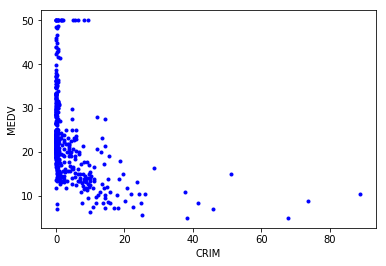

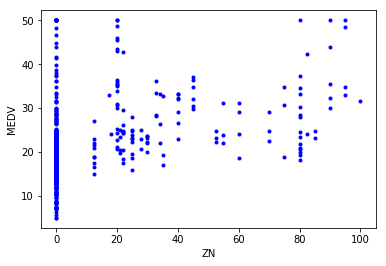

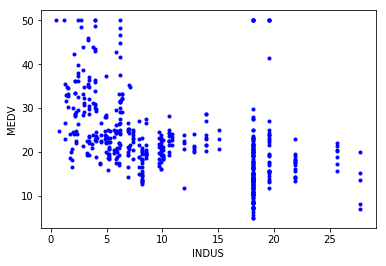

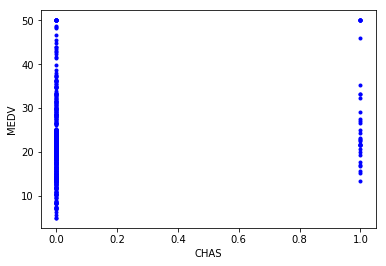

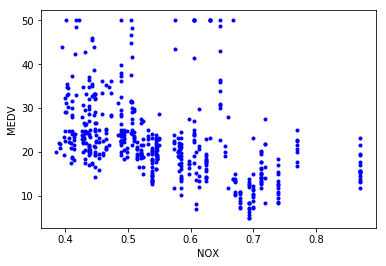

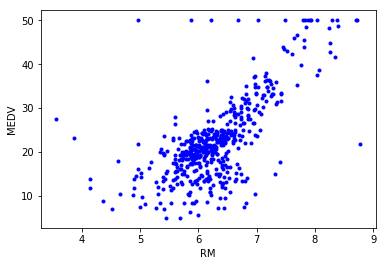

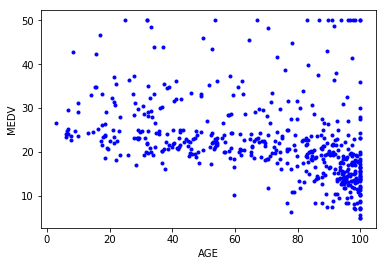

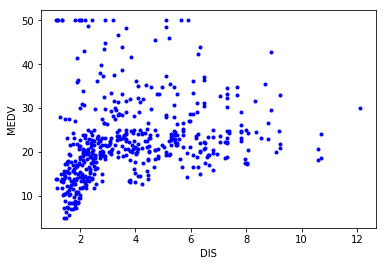

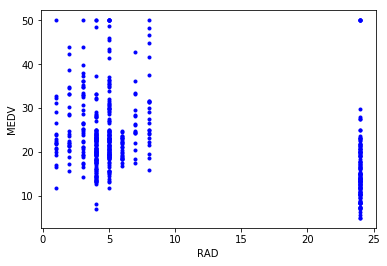

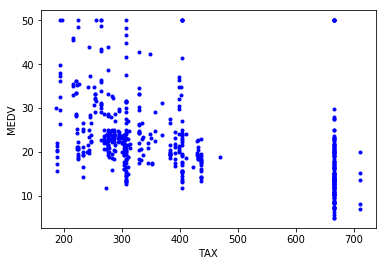

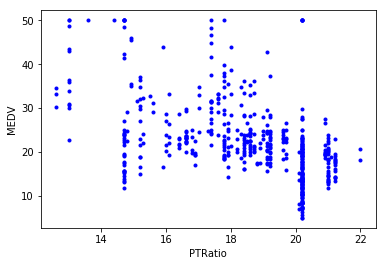

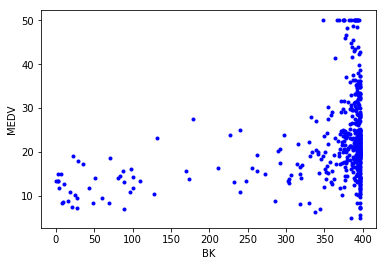

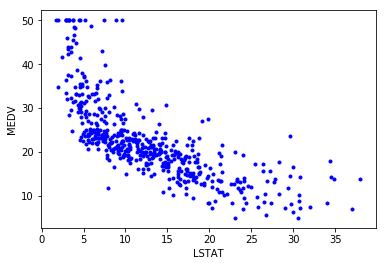

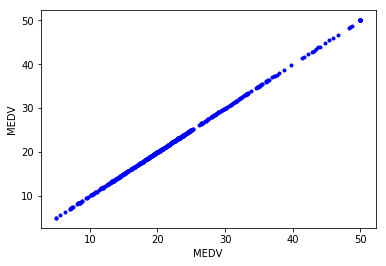

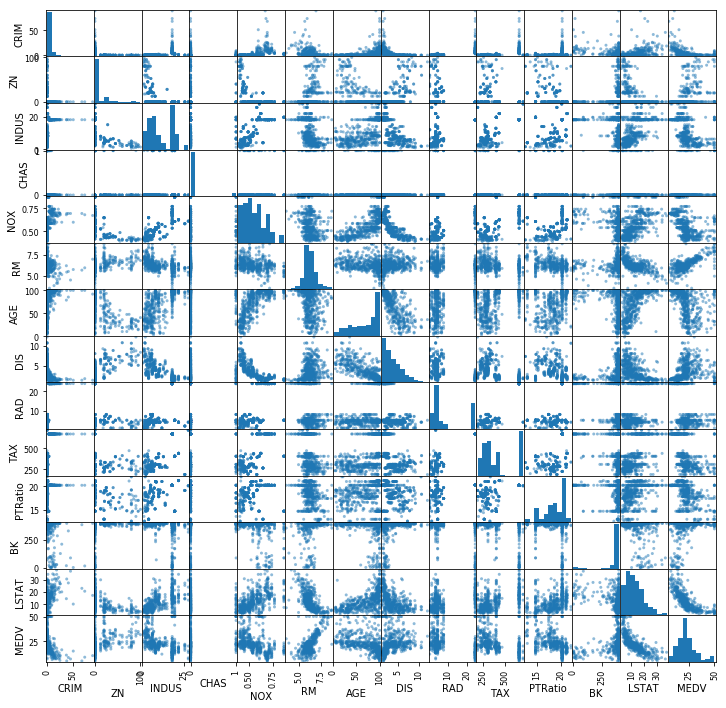

In [36]:
# Attempt to visualize data
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

for column in df.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

32.24759775084364 [-1.33920351e-01  5.70094965e-02 -1.88221108e-02  4.02559626e+00
 -1.45862269e+01  3.67271308e+00  5.37102408e-03 -1.44049045e+00
  3.64458802e-01 -1.61638007e-02 -7.23012858e-01  1.14221234e-02
 -6.03243912e-01]


3.8145131635386216

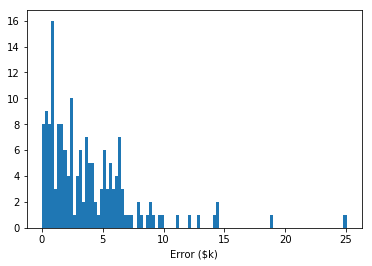

In [37]:
train_X, test_X, train_y, test_y = train_test_split(boston_housing_data.data,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

[[65.2    6.575  4.98 ]
 [78.9    6.421  9.14 ]
 [61.1    7.185  4.03 ]
 ...
 [91.     6.976  5.64 ]
 [89.3    6.794  6.48 ]
 [80.8    6.03   7.88 ]]
3.3399523164887803 [ 0.01838844  4.33264438 -0.74049262]


3.709336463034882

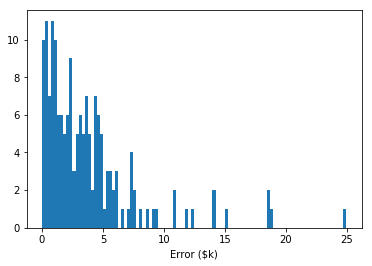

In [63]:
attributes = ["AGE","RM","LSTAT"]
boston_data_train = boston_df[attributes].values
print(boston_data_train)

train_X, test_X, train_y, test_y = train_test_split(boston_data_train,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)